In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('......\\insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


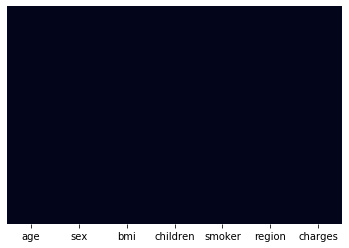

In [4]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [5]:
data.isnull().values.any()

False

------------------Data Preprocessing-----------------------

In [6]:
data_map={'male':1, 'female':0}
data['sex']=data['sex'].map(data_map)

In [7]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

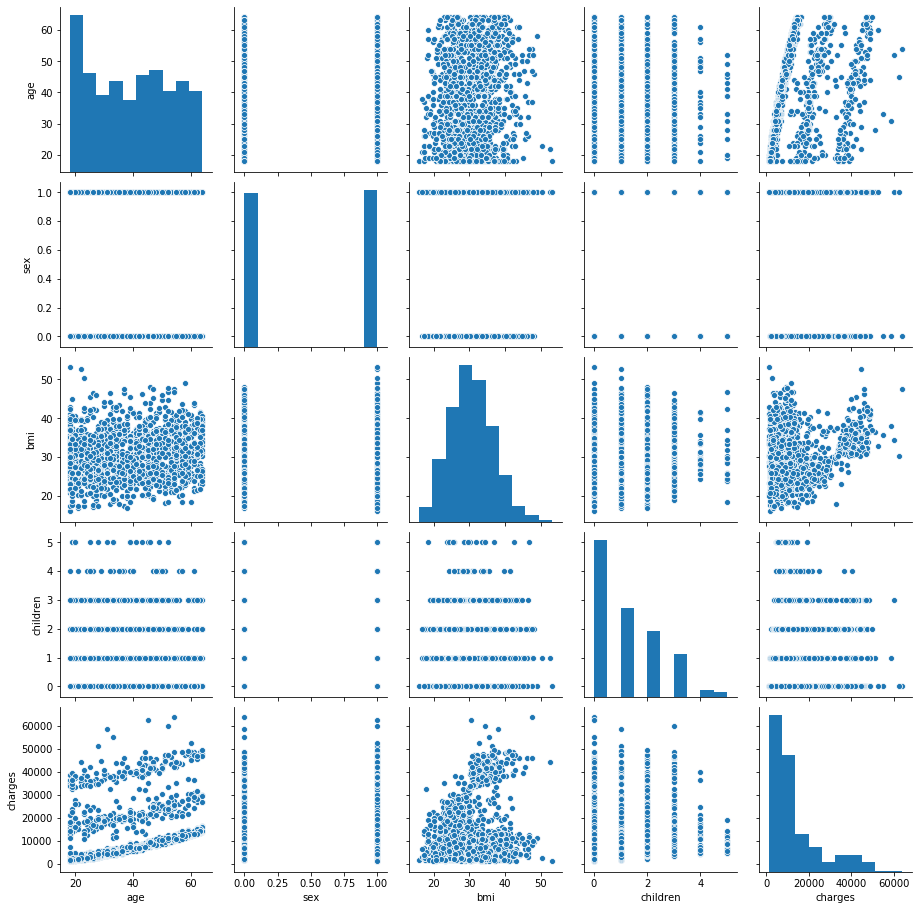

In [8]:
sns.pairplot(data)

In [9]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [10]:
data.head()# smoker:- yes-1, no-0

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


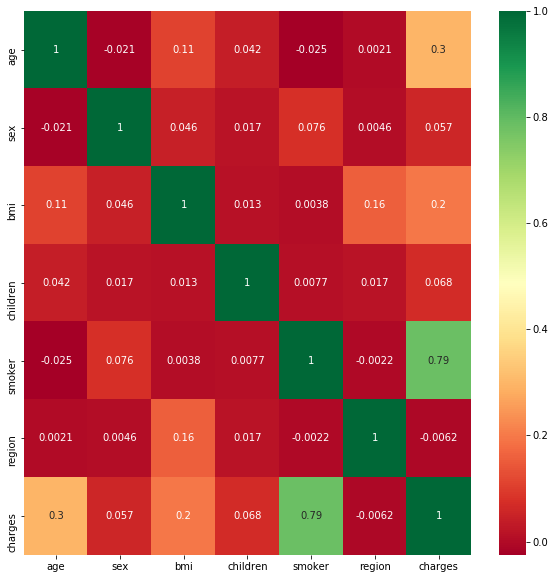

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

EDA

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

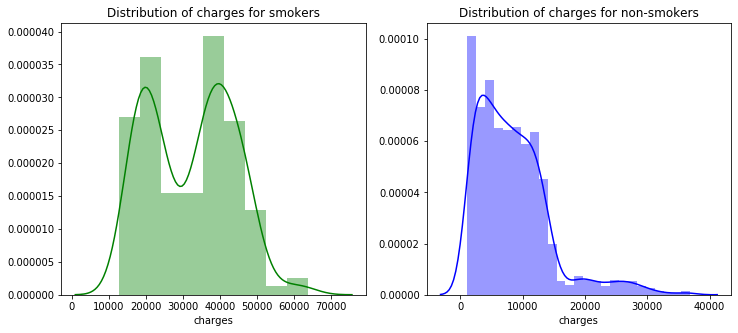

In [12]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='g',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

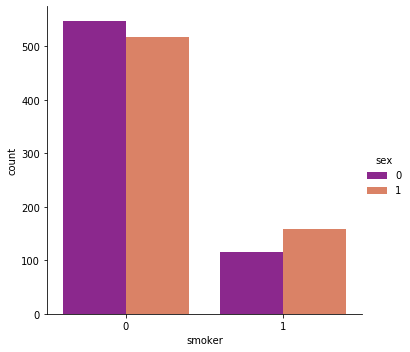

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="plasma", data=data)

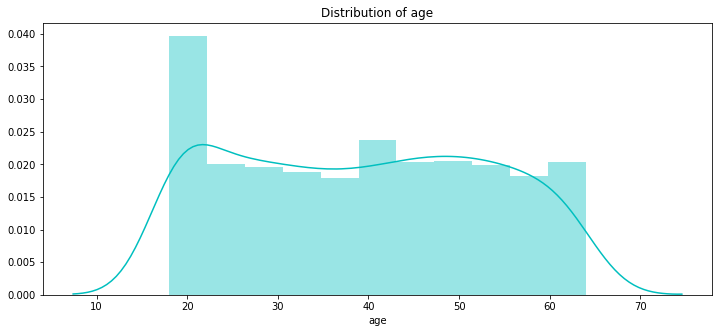

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'c')

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

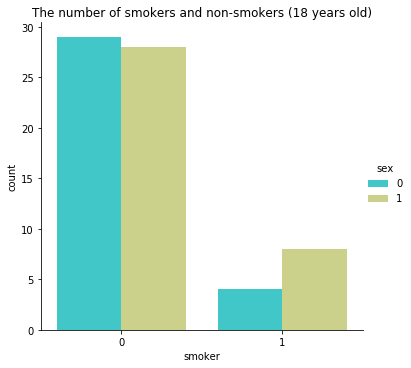

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

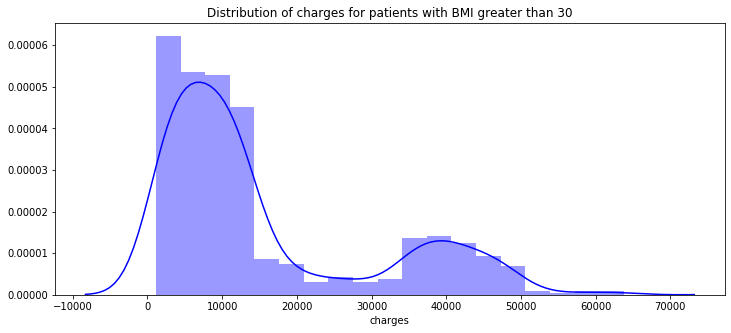

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'b')

C:\Users\Rohan Jacob\Anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


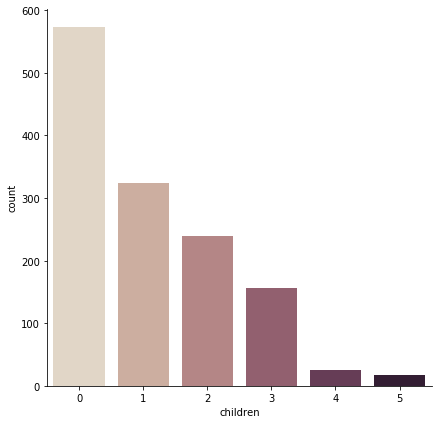

In [17]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)# Determimes the no of children, every parent has

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

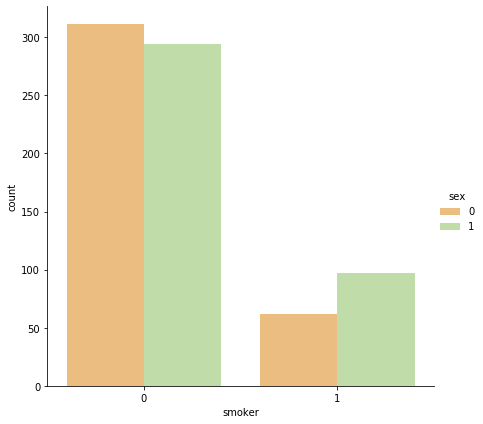

In [18]:
sns.catplot(x="smoker", kind="count", palette="Spectral",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

------------------------------------------Linear Regression--------------------------------------------------------------------

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=data.drop(['charges'],axis=1)
y=data['charges']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr.score(X_test,y_test)

0.7998747145449959

--------------------------------------Polynomial Regression--------------------------------------------------------------------

In [22]:
from sklearn.preprocessing import PolynomialFeatures
quad=PolynomialFeatures(degree=2)
scaling=StandardScaler()
X=data.drop(['charges'],axis=1)
y=data['charges']
xquad=quad.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(xquad,y, random_state = 0)
lr.fit(X_train,y_train)
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.8846283666147688


In [23]:
lr.predict(X_test)

array([11979.2139377 , 10192.58997801, 48786.76960749, 14384.96891366,
        8459.57871281,  4901.35793513,  4157.81900359, 14307.10711986,
       10325.79750149,  7715.56739861,  8073.49268036, 12203.49358138,
        8795.28674391,  5170.42164088, 25378.19018383, 12588.61318572,
       12978.36099339,  6567.96323524,  8612.26172189, 28008.45865   ,
       26367.00944519, 14934.47930007, 11398.41312029, 29933.90958861,
        3305.99318765,  7848.42827991,  3238.3873009 ,  9841.39496861,
        4876.500228  , 10653.62680315, 10644.19271503, 52645.65140354,
       14876.73071167, 12032.75113719, 13596.16536033,  5937.88844169,
       10356.87952597, 36442.2437636 , 36734.42650575,  2347.23235758,
        5363.84019624,  4652.04288084, 24856.44921178, 47383.75089689,
       35633.99700555,  6330.87095167, 12553.46618353,  8517.17440565,
        6217.81357858, 12992.09171778,  5279.73009863,  6581.30649637,
       30774.89768603, 47852.53861589, 11725.87760365,  5812.00750681,
      

---------------------------------------------Lasso Regression------------------------------------------------------------------

In [24]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)

C:\Users\Rohan Jacob\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12006779848.478165, tolerance: 14332173.513203096
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
print(clf.score(X_test,y_test))

0.8846341477600432


----------------------------------------------Ridge Regression-----------------------------------------------------------------

In [26]:
rr = linear_model.Ridge(alpha=20) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
print(rr.score(X_test,y_test))

0.8764916553782042
